# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

## 2. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
from collections import deque
%matplotlib inline

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the Unity environment
env_info = env.reset(train_mode=True)[brain_name]

action_size = brain.vector_action_space_size

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('action_size = ', action_size, '  state_size = ', state_size)

state = env_info.vector_observations[0] 
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
action_size =  4   state_size =  37


Using brain  BananaBrain
Episode 100	Average Score: 0.17	Eps: 0.90	LR: 0.0452396
Episode 200	Average Score: 0.56	Eps: 0.82	LR: 0.0409324
Episode 300	Average Score: 1.37	Eps: 0.74	LR: 0.0370354
Episode 400	Average Score: 2.25	Eps: 0.67	LR: 0.0335093
Episode 500	Average Score: 3.96	Eps: 0.61	LR: 0.0303189
Episode 600	Average Score: 4.23	Eps: 0.55	LR: 0.0274323
Episode 700	Average Score: 5.11	Eps: 0.50	LR: 0.0248206
Episode 800	Average Score: 6.39	Eps: 0.45	LR: 0.0224575
Episode 900	Average Score: 6.62	Eps: 0.41	LR: 0.0203193
Episode 1000	Average Score: 7.68	Eps: 0.37	LR: 0.0183848
Episode 1100	Average Score: 8.11	Eps: 0.33	LR: 0.0166344
Episode 1200	Average Score: 9.31	Eps: 0.30	LR: 0.0150507
Episode 1300	Average Score: 10.27	Eps: 0.27	LR: 0.0136177
Episode 1400	Average Score: 9.83	Eps: 0.25	LR: 0.01232126
Episode 1500	Average Score: 10.40	Eps: 0.22	LR: 0.0111481
Episode 1600	Average Score: 11.24	Eps: 0.20	LR: 0.0100867
Episode 1700	Average Score: 10.77	Eps: 0.18	LR: 0.0091264
Episode 18

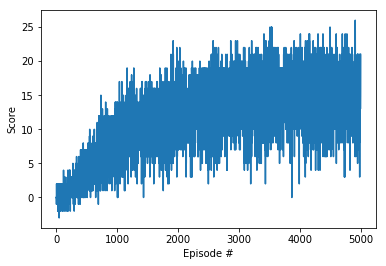

In [3]:
#
# This Deep Q-Learning network is based on the Udacity AI-Gym Lunar Lander example.
#
def dqn(brain_name, n_episodes=5000, max_t=1000, eps_start=1.0, eps_end=0.0005, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon    
     
    LR       = 0.05
    LR_decay = 0.999
    LR_min   = 0.00001
    for i_episode in range(1, n_episodes+1):
        
        # Reset the Unity environment and obtain the current information from it.
        # env_info contains information on the current state, the current reward,
        # and information on whether or not the current episode has finished.
        env_info = env.reset(train_mode=True)[brain_name]
        
        # Get the current state info from env_info
        state    = env_info.vector_observations[0]  
        
        # Initialize the score for this episode.  This will increase (or, decrease) with
        # each earned reward.
        score    = 0
            
        # Decrease LR slightly with each episode
        LR *= LR_decay
        LR  = max(LR, LR_min)
        
        # Each episode consists of max_t time steps.  Execute each of them now.
        for t in range(max_t):         
            action     = agent.act(state, eps)             # let the agent select an action
            env_info   = env.step(int(action))[brain_name] # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward     = env_info.rewards[0]               # get the reward
            done       = env_info.local_done[0]            # see if episode has finished
            score      += reward                           # update the score

            # Important:  step the agent so it can learn from the reward achieved in the
            # current state based on the selected action.
            agent.step(state, action, reward, next_state, done)
                
            state      = next_state                        # roll over the state to next time step

            if done:                                       # exit loop if episode finished
                break
        
        # 
        # This episode is complete.  Update the scores and decrease eps for the next episode.
        #
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        # Report current status (episode number, current average score over the past 100 episodes, and current eps)
        print('\rEpisode {}\tAverage Score: {:.2f}\tEps: {:.2f}\tLR: {:.7f}'.format(i_episode, np.mean(scores_window), eps, LR), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    # All the scheduled episode have completed.  Return the scores so they can be plotted.
    return scores

print('Using brain ', brain_name)

# Execute the deep-q learning process
scores = dqn(brain_name)

# Save the agent so that it can later be restored if needed.
agent.save('navigation_checkpoint.pt')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env.close()